In [1]:
%matplotlib inline
import sys
print(sys.version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
import io
import scipy

# Update the matplotlib configuration parameters:
mpl.rcParams.update({'font.size': 18, 'font.family': 'serif', 'xtick.major.pad' : 5, 'ytick.major.pad' : 5})

3.10.8 (v3.10.8:aaaf517424, Oct 11 2022, 10:14:40) [Clang 13.0.0 (clang-1300.0.29.30)]


In [2]:
# Loading our data in its raw form

urlGam = "https://drive.google.com/uc?export=download&id=1TvbbCV-kJeNMuIORMyiMFgH_u_CQSZhX" # Make sure the url is the raw version of the file on GitHub
downloadGam = requests.get(urlGam).content
GamRaw = pd.read_csv(io.StringIO(downloadGam.decode('utf-8')))

urlNeut = "https://drive.google.com/uc?export=download&id=1bY6ZPF3WLxfviYSSViuw1SEx1_sWxP46" # Make sure the url is the raw version of the file on GitHub
downloadNeut = requests.get(urlNeut).content
NeutRaw = pd.read_csv(io.StringIO(downloadNeut.decode('utf-8')))


In [29]:
# Normalizing Data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(GamRaw)
scaledGam = scaler.transform(GamRaw)
gamNormal = pd.DataFrame(scaledGam, columns=GamRaw.columns)
gamNormal.head()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,0.309014,0.500017,0.316455,0.391304,0.0,0.239100,0.571571,0.929306,0.954548,0.011228,0.374372
1,0.137330,0.168001,0.896980,0.391304,0.0,0.664525,0.537218,0.956967,0.966199,0.000418,0.677404
2,0.797621,0.147970,0.527490,0.347826,0.0,0.416199,0.587327,0.958785,0.960309,0.010556,0.305103
3,0.981994,0.664871,0.590116,0.413043,0.0,0.495234,0.658971,0.942428,0.954145,0.002930,0.693429
4,0.546102,0.456917,0.608336,0.434783,0.0,0.547988,0.708769,0.962667,0.961407,0.002104,0.885402


In [28]:
scaler.fit(NeutRaw)
scaledNeut = scaler.transform(NeutRaw)
neutNormal = pd.DataFrame(scaledNeut, columns=NeutRaw.columns)
neutNormal.head()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,0.277350,0.506336,0.046628,0.050847,0.0,0.065102,1.000000,1.000000,0.845587,0.034378,0.681348
1,0.510501,0.641275,0.129485,0.220339,0.0,0.074894,0.338857,0.918015,0.887481,0.030818,0.883004
2,0.118249,0.458065,0.355208,0.355932,0.2,0.246332,0.483786,0.815185,0.866884,0.019507,0.799575
3,0.516117,0.509907,0.244931,0.288136,0.2,0.134062,0.447837,0.742040,0.734324,0.063638,0.908396
4,0.606277,0.264127,0.193122,0.220339,0.0,0.191992,0.916604,0.689069,0.883198,0.014785,0.944172


In [30]:
# Making the training data sets

gamTest = gamNormal.sample(frac=0.05)
neutTest = neutNormal.sample(frac=0.05)

In [31]:
# Have a look at the data.

# gamTest.head()
print(neutTest.shape)
neutTest.head()

(2176, 11)


,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
28249,0.407177,0.285599,0.232635,0.406780,0.0,0.126990,0.405053,0.810861,0.581456,0.188119,0.995283
3808,0.225120,0.614704,0.149949,0.203390,0.0,0.068241,0.481915,0.533100,0.926004,0.004163,0.610234
17789,0.668017,0.485651,0.090940,0.169492,0.0,0.051135,0.530173,0.796367,0.488528,0.082988,0.974123
23452,0.108392,0.319058,0.194065,0.271186,0.0,0.136857,0.509637,0.810585,0.868946,0.007202,0.968570
13133,0.848873,0.726380,0.236175,0.084746,0.0,0.246042,0.679416,0.942320,0.967991,0.013804,0.356510


In [32]:
# gamTest[['E']].describe()
gamTest.describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000
mean,0.492366,0.483659,0.560352,0.409634,0.004520,0.454633,0.634284,0.934740,0.950369,0.008440,0.490503
std,0.290606,0.289990,0.226422,0.128474,0.029733,0.206108,0.179212,0.064546,0.035839,0.010367,0.248066
min,0.000582,0.000092,0.000063,0.000000,0.000000,0.002616,0.079068,0.269837,0.475034,0.000000,0.000000
25%,0.231434,0.227173,0.370278,0.326087,0.000000,0.288828,0.516194,0.929401,0.948225,0.003688,0.289046
50%,0.495289,0.472462,0.560940,0.413043,0.000000,0.432758,0.681548,0.944483,0.957593,0.006172,0.388743
75%,0.724738,0.726704,0.755005,0.500000,0.000000,0.609485,0.775106,0.957541,0.965754,0.009766,0.714212
max,0.995462,0.999772,0.974908,0.891304,0.200000,0.964495,1.000000,1.000000,1.000000,0.200385,0.995516


In [33]:
neutTest.describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,0.442999,0.505250,0.200428,0.225519,0.024632,0.135718,0.526758,0.831526,0.809264,0.044261,0.773436
std,0.268677,0.291283,0.136648,0.138119,0.075627,0.092703,0.207087,0.155993,0.208518,0.073987,0.269265
min,0.000000,0.000422,0.000851,0.000000,0.000000,0.000538,0.072606,0.164606,0.000000,0.000000,0.000000
25%,0.206203,0.250508,0.091387,0.118644,0.000000,0.063453,0.371161,0.747244,0.782529,0.009334,0.644924
50%,0.424948,0.511378,0.175056,0.203390,0.000000,0.119870,0.500008,0.861820,0.878050,0.020586,0.900559
75%,0.675560,0.753679,0.280815,0.305085,0.000000,0.185018,0.670888,0.961436,0.931698,0.044034,0.972547
max,1.000000,0.999583,0.957615,0.898305,0.600000,0.593470,1.000000,1.000000,1.000000,0.604208,0.999778


In [34]:
#
# Try out sorting the dataGam table and please note the index
#
gamTest.sort_values(by=['E'], inplace=True)
gamTest.reset_index(drop=True, inplace=True)
                    
gamTest['Type'] = pd.Series([1 for x in range(len(gamTest.index))])
                    
gamTest.head(10)

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom,Type
0,0.913618,0.830943,0.000063,0.000000,0.0,0.002616,1.000000,1.0,1.000000,7.753185e-47,0.000000,1
1,0.993967,0.471314,0.003804,0.000000,0.0,0.007092,1.000000,1.0,1.000000,7.638959e-48,0.000000,1
2,0.916521,0.906980,0.004207,0.021739,0.0,0.006175,0.832963,1.0,0.983365,9.998354e-03,0.000000,1
3,0.924651,0.277992,0.006436,0.000000,0.0,0.010239,1.000000,1.0,1.000000,5.002168e-46,0.000000,1
4,0.926145,0.233305,0.008106,0.000000,0.0,0.012236,1.000000,1.0,1.000000,2.330340e-47,0.000000,1
5,0.923451,0.965325,0.009138,0.021739,0.0,0.006746,0.480268,1.0,0.982263,2.038001e-03,0.000000,1
6,0.923679,0.247653,0.011852,0.065217,0.0,0.012322,0.880104,1.0,0.650341,1.132475e-01,0.982790,1
7,0.913637,0.919196,0.011920,0.021739,0.0,0.013181,1.000000,1.0,0.801639,2.003855e-01,0.000000,1
8,0.995449,0.509707,0.019468,0.000000,0.0,0.025826,1.000000,1.0,1.000000,0.000000e+00,0.000000,1
9,0.920752,0.723312,0.019587,0.086957,0.0,0.019640,0.918334,1.0,0.799986,1.419799e-01,0.890098,1


In [35]:
#
# Try out sorting the dataGam table and please note the index
#
neutTest.sort_values(by=['E'], inplace=True)
neutTest.reset_index(drop=True, inplace=True)

neutTest['Type'] = pd.Series([0 for x in range(len(neutTest.index))])

neutTest.head(10)

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom,Type
0,0.505536,0.190755,0.000851,0.050847,0.0,0.000958,1.000000,1.000000,0.912149,2.368034e-02,0.404677,0
1,0.819554,0.885073,0.001000,0.050847,0.0,0.000740,1.000000,1.000000,0.000000,0.000000e+00,0.996270,0
2,0.561797,0.255879,0.002336,0.067797,0.0,0.000540,0.529223,1.000000,0.000000,0.000000e+00,0.998349,0
3,0.832431,0.985936,0.002452,0.033898,0.0,0.004688,0.689004,1.000000,0.491254,4.442585e-01,0.904369,0
4,0.767435,0.183519,0.002455,0.000000,0.0,0.010465,1.000000,1.000000,1.000000,3.189612e-47,0.000000,0
5,0.730724,0.714158,0.002681,0.000000,0.0,0.010805,1.000000,1.000000,1.000000,2.503805e-48,0.000000,0
6,0.872415,0.108989,0.002751,0.033898,0.0,0.004659,0.658108,1.000000,0.586593,1.047719e-01,0.536833,0
7,0.407327,0.963928,0.003363,0.067797,0.0,0.000538,1.000000,1.000000,0.000000,0.000000e+00,0.997351,0
8,0.771959,0.902250,0.003542,0.050847,0.0,0.002720,0.515719,0.404155,0.950565,7.732666e-03,0.412390,0
9,0.837489,0.345063,0.003709,0.000000,0.0,0.012354,1.000000,1.000000,1.000000,6.762378e-48,0.000000,0


In [36]:
plotFrame = pd.concat([gamTest, neutTest], ignore_index=True, axis=0)

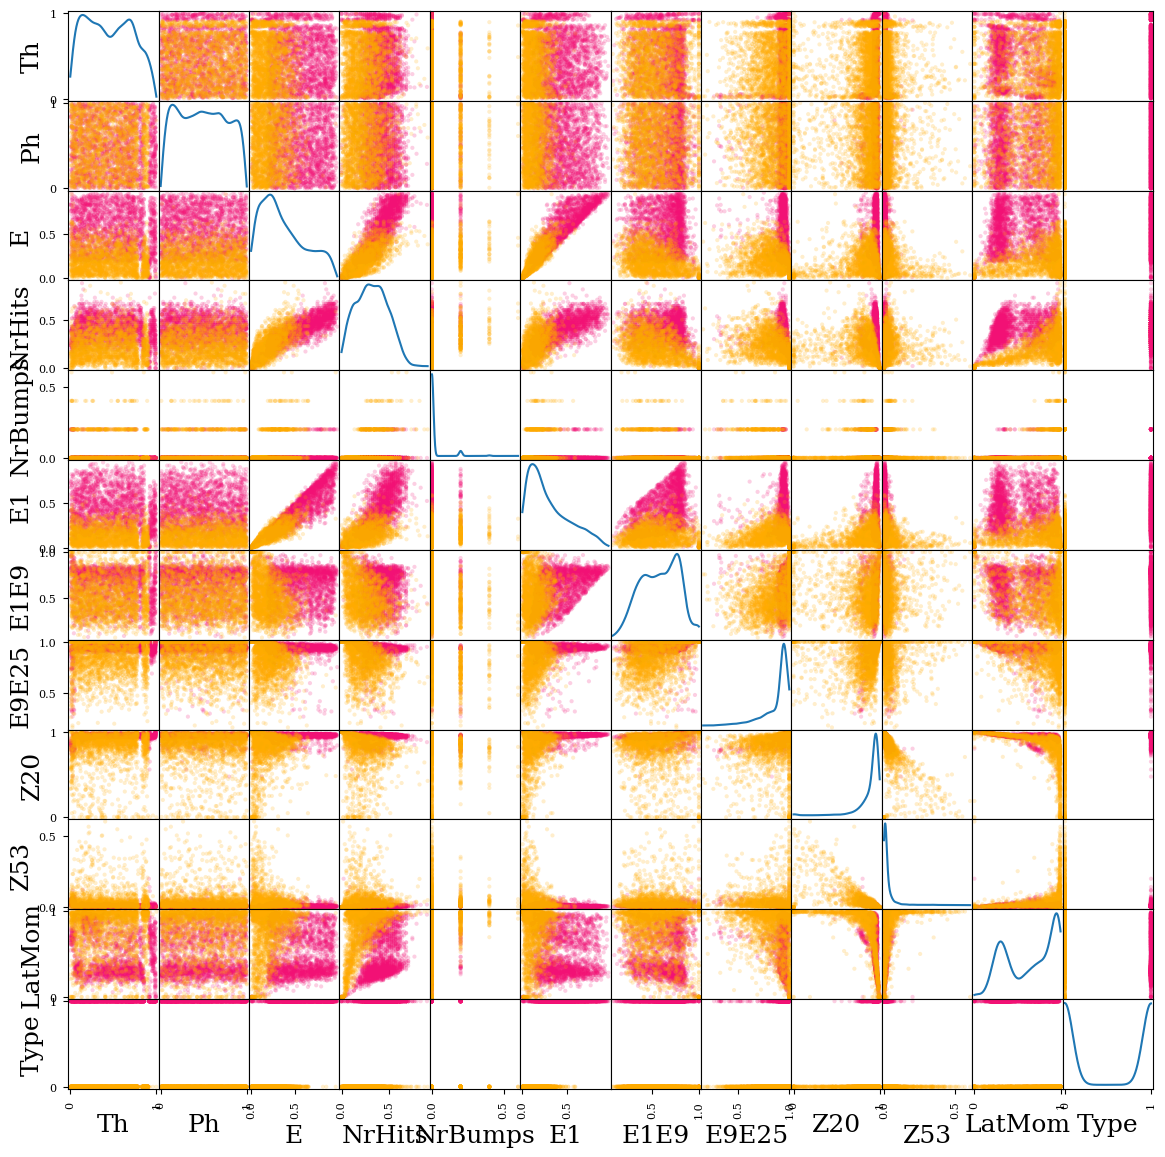

In [39]:
colors = ['#f21175', '#ffab00']

_ = pd.plotting.scatter_matrix(plotFrame, figsize=(14,14), diagonal='kde', alpha=0.2, color=[colors[x-1] for x in list(plotFrame.Type)])


# My personal Plotting function that I made before I added the type column

In [11]:
# The Blue hue corresponds to the Photons, the green to the Neutrons

def matrixPlot(categories, save=False, name='figure'):
    """
    Produces a matrix plot to compare across dataframes.
    """
    
    plotNum = len(categories)
    fig, axes = plt.subplots(nrows=plotNum, ncols=plotNum,
                            figsize=(14, 14),
                            layout="constrained",
                             sharex=True,
                             sharey=True
                            )

    for i in range(plotNum):
        for j in range(plotNum):
            gamTest.plot(ax=axes[i,j], kind='scatter', x=categories[j], y=categories[i], color='#228888', s=10, alpha=0.4)
            neutTest.plot(ax=axes[i,j], kind='scatter', x=categories[j], y=categories[i], color='#a8ba1c', s=10, alpha=0.3)
    if save:
        plt.savefig(name)
    plt.show()


In [134]:
stuff = ['E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom']

# matrixPlot(stuff, save=True, name='PlsWork')

In [117]:

from sklearn import cluster # The magic box!!!

start = np.array([[0, 0.25]]) # Starting centroids

k = 1 #number of clusters
#kmeans = cluster.KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=1)
kmeans = cluster.KMeans(n_clusters=k, max_iter=1000, init=start, n_init=1)
kmeans.fit(gamTest[['E','LatMom']])

#
# The output of the "fit" are arrays of list of labels matching input dataGam set,
# the found centroids, and other useful parameters such as number of iterations it took.
#
labels    = kmeans.labels_
centroids = kmeans.cluster_centers_
nriter    = kmeans.n_iter_

print("labels:    ", labels)
print("centroids: ", centroids)
print("nriters:   ", nriter)

labels:     [0 0 0 ... 0 0 0]
centroids:  [[0.56035175 0.49050254]]
nriters:    2


In [140]:
def getClusters(k, frame, variables):
    '''
    Plots two parameters from a dataframe with cluster centers.
    
    Parameters:
    k (int)                  -- Number of clusters
    frame (pandas dataframe) -- The dataframe to examine
    variables (numpy array)  -- Columns to examine
    '''
    
    start = np.random.rand(k, 2)
    
    kmeans = cluster.KMeans(n_clusters=k, max_iter=1000, init=start, n_init=1)
    kmeans.fit(frame[variables])
    
    labels    = kmeans.labels_
    centroids = kmeans.cluster_centers_
    nriter    = kmeans.n_iter_
    
    centroids = centroids.reshape(k, 2)
    centroidFrame = pd.DataFrame(centroids, columns =['x', 'y'])
    
    fig, axes = plt.subplots(nrows=1, ncols=1,
                            figsize=(8, 8),
                            layout="constrained"
                            )

    sns.scatterplot(data=frame, x=variables[0], y=variables[1], marker='.', hue='Type', ax=axes).set_title(f'{variables[0]} v.s. {variables[1]}')
    sns.scatterplot(data=centroidFrame, x='x', y='y', marker='X', color='black', s=200, ax=axes)
    plt.show()


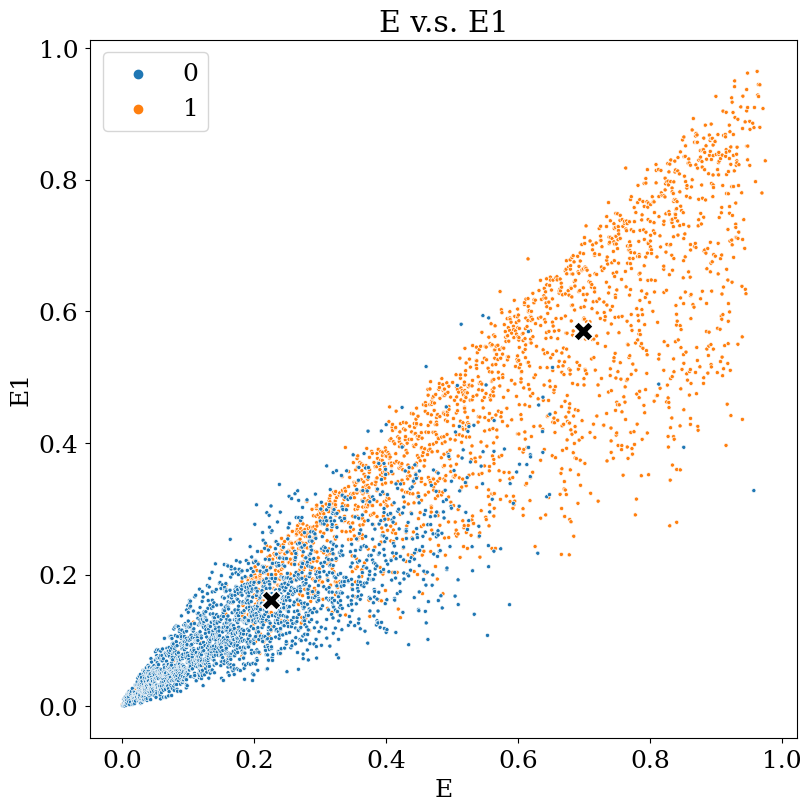

In [146]:
getClusters(2, plotFrame, ['E', 'E1'])

In [105]:
centroids = centroids.reshape(1, 2)
centroidFrame = pd.DataFrame(centroids, columns =['x', 'y'])


In [ ]:
# Professor Magic

def plot_clusters(dataFrame, centroids, labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        subset = dataFrame[np.where(labels==i)]
        plt.plot(subset[:,0],subset[:,1],'o')
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        plt.setp(lines,ms=15.0, mew=3.0)
    plt.xlabel('E')
    plt.ylabel('LatMom')  
    plt.show()

In [87]:
# !pip install seaborn

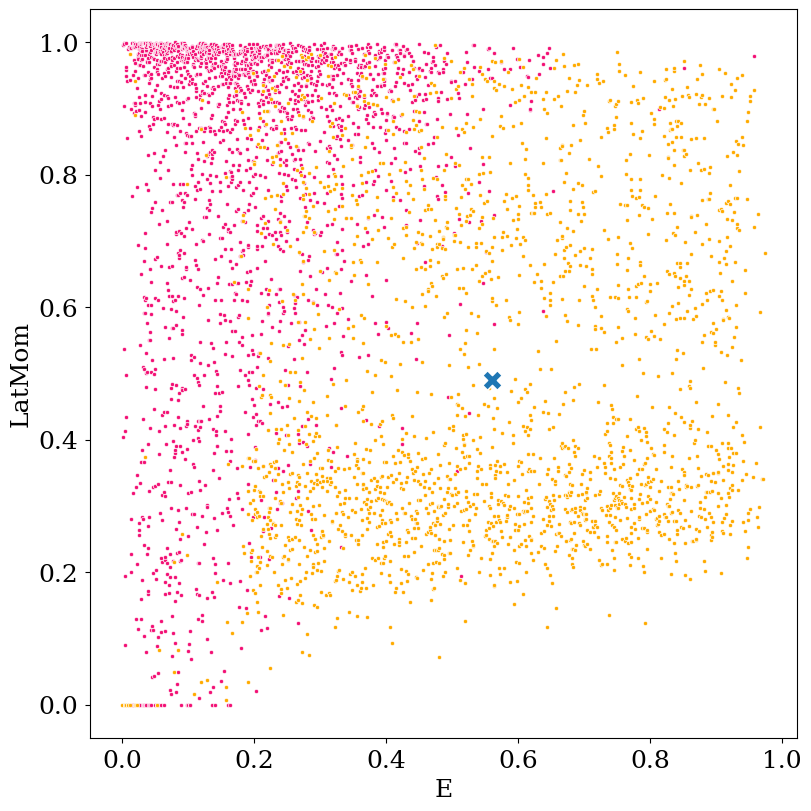

In [106]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=1,
                            figsize=(8, 8),
                            layout="constrained"
                            )

# gamTest.plot(kind='scatter', x='E', y='LatMom', alpha=0.4, ax=axes)
# centroidFrame.plot(kind='scatter', x='x', y='y', color='r', marker='x', ax=axes)

sns.scatterplot(data=neutTest, x='E', y='LatMom', marker='.', color='#f21175', ax=axes)


sns.scatterplot(data=gamTest, x='E', y='LatMom', marker='.',color='#ffab00', ax=axes)
sns.scatterplot(data=centroidFrame, x='x', y='y', marker='X', s=200, ax=axes)

plt.show()

In [49]:
#
# Plot it now...
#
plot_clusters(gamTest[['E','LatMom']], centroids, labels)

InvalidIndexError: (array([   6,    9,   10,   21,   23,   25,   26,   30,   35,   36,   37,
         38,   41,   42,   45,   50,   55,   61,   65,   67,   81,   82,
         90,   94,   99,  104,  106,  108,  110,  111,  112,  114,  116,
        117,  123,  126,  138,  140,  143,  145,  146,  148,  152,  154,
        157,  160,  162,  165,  166,  169,  173,  174,  178,  182,  183,
        185,  187,  192,  193,  197,  202,  204,  216,  217,  226,  227,
        231,  233,  236,  237,  251,  254,  257,  262,  264,  265,  268,
        271,  272,  273,  274,  275,  276,  277,  278,  279,  281,  283,
        284,  286,  289,  291,  293,  294,  295,  302,  303,  305,  306,
        308,  313,  318,  320,  329,  332,  340,  350,  355,  356,  357,
        363,  373,  375,  383,  384,  385,  387,  390,  392,  397,  398,
        399,  403,  406,  407,  408,  409,  410,  411,  412,  416,  417,
        418,  421,  424,  435,  439,  441,  442,  444,  447,  453,  457,
        459,  460,  467,  468,  469,  472,  475,  476,  477,  479,  481,
        483,  484,  491,  492,  493,  494,  499,  502,  507,  509,  511,
        512,  513,  515,  530,  531,  532,  533,  534,  536,  538,  540,
        547,  549,  551,  552,  553,  558,  565,  566,  569,  576,  578,
        581,  584,  585,  588,  590,  609,  611,  617,  621,  625,  629,
        632,  633,  641,  648,  651,  654,  656,  657,  658,  659,  661,
        662,  666,  669,  672,  679,  682,  689,  693,  695,  699,  700,
        706,  707,  708,  709,  718,  720,  722,  725,  730,  732,  733,
        734,  737,  738,  741,  747,  748,  749,  750,  763,  764,  765,
        766,  769,  770,  771,  773,  774,  776,  777,  778,  779,  783,
        784,  786,  788,  790,  795,  797,  800,  801,  804,  806,  807,
        809,  811,  814,  815,  820,  822,  828,  830,  836,  838,  841,
        842,  843,  846,  847,  848,  850,  855,  858,  866,  867,  869,
        870,  871,  872,  875,  877,  880,  881,  885,  887,  889,  890,
        891,  892,  893,  894,  897,  910,  911,  919,  920,  921,  923,
        926,  927,  929,  932,  936,  940,  941,  942,  943,  945,  948,
        949,  951,  953,  955,  957,  964,  967,  969,  973,  975,  977,
        978,  980,  981,  985,  988,  991,  992,  997, 1000, 1001, 1002,
       1003, 1004, 1005, 1011, 1012, 1017, 1018, 1019, 1022, 1027, 1028,
       1030, 1032, 1033, 1035, 1037, 1039, 1041, 1042, 1044, 1045, 1046,
       1047, 1048, 1051, 1052, 1054, 1058, 1059, 1063, 1064, 1067, 1072,
       1075, 1079, 1081, 1083, 1084, 1085, 1087, 1089, 1092, 1096, 1100,
       1107, 1110, 1111, 1117, 1121, 1125, 1128, 1130, 1132, 1134, 1135,
       1137, 1138, 1141, 1144, 1145, 1148, 1151, 1153, 1158, 1159, 1163,
       1166, 1167, 1168, 1170, 1172, 1180, 1181, 1183, 1184, 1189, 1190,
       1193, 1194, 1195, 1199, 1201, 1203, 1204, 1207, 1209, 1210, 1212,
       1214, 1215, 1220, 1222, 1225, 1227, 1229, 1238, 1239, 1240, 1244,
       1250, 1251, 1252, 1263, 1265, 1266, 1268, 1270, 1271, 1272, 1273,
       1274, 1276, 1278, 1282, 1283, 1284, 1286, 1287, 1290, 1292, 1293,
       1298, 1299, 1300, 1302, 1306, 1307, 1317, 1319, 1320, 1321, 1331,
       1333, 1335, 1340, 1341, 1343, 1346, 1350, 1355, 1356, 1357, 1358,
       1360, 1362, 1363, 1366, 1367, 1368, 1369, 1371, 1372, 1373, 1374,
       1376, 1377, 1379, 1383, 1385, 1388, 1390, 1394, 1395, 1396, 1401,
       1404, 1405, 1408, 1409, 1412, 1413, 1415, 1427, 1428, 1430, 1433,
       1439, 1442, 1445, 1447, 1448, 1450, 1451, 1455, 1456, 1457, 1458,
       1461, 1464, 1465, 1466, 1470, 1471, 1476, 1477, 1479, 1480, 1484,
       1490, 1492, 1497, 1498, 1503, 1504, 1505, 1507, 1508, 1511, 1512,
       1515, 1518, 1519, 1520, 1522, 1523, 1525, 1526, 1529, 1533, 1536,
       1537, 1540, 1541, 1544, 1546, 1547, 1553, 1561, 1562, 1566, 1572,
       1573, 1585, 1590, 1597, 1598, 1599, 1601, 1605, 1606, 1607, 1609,
       1611, 1612, 1613, 1615, 1618, 1622, 1623, 1624, 1634, 1640, 1642,
       1643, 1645, 1648, 1651, 1652, 1653, 1654, 1657, 1658, 1659, 1662,
       1664, 1675, 1677, 1678, 1679, 1680, 1682, 1683, 1684, 1689, 1691,
       1692, 1693, 1694, 1696, 1700, 1701, 1708, 1709, 1711, 1712, 1713,
       1714, 1715, 1716, 1718, 1719, 1724, 1725, 1729, 1733, 1735, 1740,
       1743, 1750, 1752, 1756, 1757, 1758, 1759, 1762, 1765, 1766, 1769,
       1773, 1776, 1777, 1778, 1779, 1780, 1786, 1793, 1794, 1798, 1800,
       1803, 1805, 1807, 1809, 1810, 1812, 1813, 1814, 1817, 1821, 1823,
       1824, 1825, 1826, 1827, 1829, 1832, 1834, 1835, 1841, 1842, 1846,
       1847, 1849, 1850, 1851, 1853, 1854, 1855, 1857, 1858, 1859, 1863,
       1865, 1866, 1868, 1870, 1871, 1872, 1873, 1875, 1876, 1877, 1879,
       1881, 1883, 1885, 1886, 1887, 1888, 1891, 1894, 1895, 1896, 1898,
       1900, 1901, 1903, 1904, 1906, 1908, 1910, 1912, 1916, 1918, 1919,
       1920, 1921, 1923, 1924, 1925, 1927, 1935, 1936, 1937, 1939, 1941,
       1942, 1945, 1948, 1949, 1954, 1955, 1956, 1958, 1960, 1964, 1968,
       1970, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1984,
       1985, 1987, 1988, 1992, 1993, 1998, 2001, 2003, 2004, 2006, 2007,
       2008, 2010, 2011, 2012, 2014, 2024, 2025, 2027, 2029, 2030, 2031,
       2032, 2034, 2036, 2043, 2044, 2045, 2046, 2048, 2049, 2051, 2053,
       2054, 2055, 2056, 2057, 2063, 2064, 2067, 2068, 2070, 2071, 2072,
       2074, 2076, 2077, 2078, 2079, 2080, 2083, 2089, 2091, 2092, 2095,
       2097, 2098, 2103, 2105, 2106, 2110, 2111, 2112, 2113, 2114, 2115,
       2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2128, 2129, 2131,
       2132, 2133, 2135, 2137, 2141, 2143, 2145, 2146, 2149, 2152, 2154,
       2156, 2157, 2161, 2163, 2167]),)

<Figure size 800x600 with 0 Axes>

In [ ]:
#
# Lets play with MeansShift algorithm as another example
# Note that the logic to set it up looks very similar to KMeans
#
meanshift = cluster.MeanShift(bandwidth=2)
meanshift.fit(dataGamsel)

labels    = meanshift.labels_
centroids = meanshift.cluster_centers_
nriter    = meanshift.n_iter_

In [ ]:
#print("labels:    ", labels)
print("centroids: ", centroids)
print("nriters:   ", nriter)

In [ ]:
#
# Lets plot the outcome of MeanShift
# Note that I use the same plot function earlier defined
#
plot_clusters(dataGamsel, centroids, labels)

In [ ]:
#
# How to find the optimum value for "k" and "bandwidth"?
# One may use some of the metrics part of the sklearn library
# One of them is the so-called silhouette_score which can be used to find the optimum
#

from sklearn.metrics import silhouette_score

#
# Lets define two functions that return the silhouette score for KMeans and MeanShift
# 

def kmeans_silhouette(k):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=1)
    kmeans.fit(dataGamsel)
    
    score = silhouette_score(dataGamsel, kmeans.labels_)
    return score

def meanshift_silhouette(bw):
    meanshift = cluster.MeanShift(bandwidth=bw)
    meanshift.fit(dataGamsel)
    
    score = silhouette_score(dataGamsel, meanshift.labels_)
    return score

In [ ]:
#
# Plot the silhouette score as a function of "k" (KMeans)
# Note that the best "k" value corresponds when silhouette is maximal
#

klist = np.arange(2,10,1)

silhouettes = []
for k in klist:
    silhouettes.append(kmeans_silhouette(k))

plt.figure(figsize=(8, 8))
plt.plot(klist, silhouettes, 'ro-', lw=2)
plt.title('KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.ylim(0, 0.6)
plt.xlim(1,10)

In [ ]:
#
# Plot the silhouette score as a function of "bandwidth" (MeanShift)
# Note that the best bandwidth value corresponds when silhouette is maximal
#

bandwidthlist = np.arange(0.05,1.55,0.05) 

silhouettes = []  
for bw in bandwidthlist:
    silhouettes.append(meanshift_silhouette(bw))

plt.figure(figsize=(8, 8))
plt.plot(bandwidthlist, silhouettes, 'ro-', lw=2)
plt.title('MeanShift')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette coefficient')
plt.ylim(0, 0.6)

### Homework tasks:

   - Since we do have the true labels of each instance, setup a performance metric that returns the number of false labels (error rate) for each clustering algorithm.
   - Play with the clustering algorithms using higher dimensions, and verify that the error rate reduces.
   - Study other clustering methods than KMeans and MeanShift and compare pros and cons.